Importing all Important Libraries to be used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Importing digits data from sklearn datasets

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

# printing some information about the digits dataset
print(digits.DESCR)
print(digits.data)
print(digits.target)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

To visualize the data image, we need to use Matplotlib.

<Figure size 640x480 with 0 Axes>

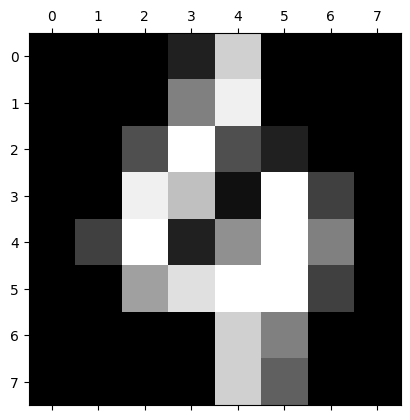

4


In [3]:
# visualizing the image at index 100
plt.gray()
plt.matshow(digits.images[100])
plt.show()

# printing the target (the number) at index 100
print(digits.target[100])

To visualize multiple images (say 64)

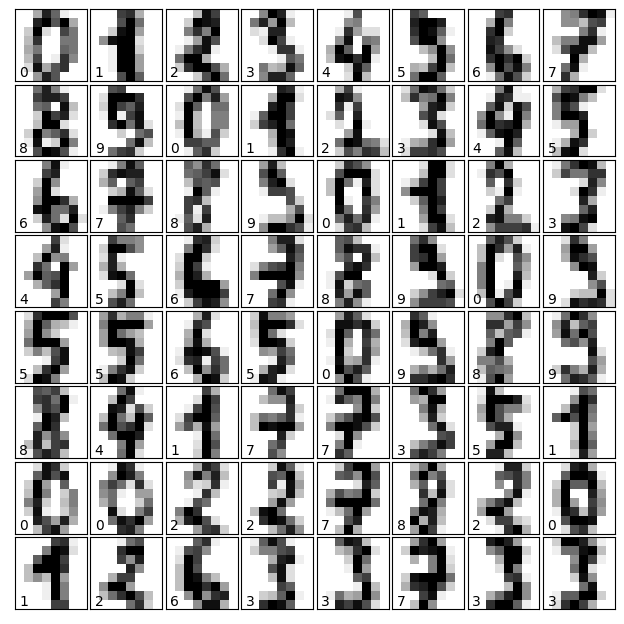

In [4]:
# figure size (width, heihgt)
fig = plt.figure(figsize=(6, 6))

# adjust the subplots
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace=0.05, wspace=0.05)

# for each of the 64 images
for i in range(64):
    # initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1 th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    # display an image at the i-th positon
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

plt.show()

Since there are 10 digits (0, 1, ... , 8, 9), we need to make total of 10 clusters

In [5]:
# no. of clusters
k = 10  

# creating KMeans Clustering Model and fitting the data in the model
model = KMeans(n_clusters=k, random_state=69) # random_state ensures the model is same everytime its run
# fitting the model with digits.data
model.fit(digits.data)

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=69)

Visualizing the Centroids after K-Means

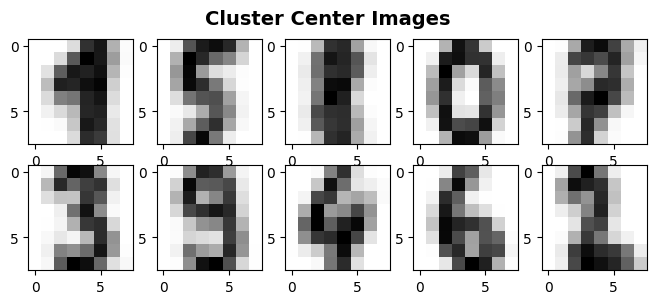

In [6]:
new_fig = plt.figure(figsize=(8, 3))
new_fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

for i in range(10):
    # initialize subplots in a grid of 2x5, at i+1 th position
    ax = new_fig.add_subplot(2, 5, i+1)
    # display images
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
plt.show()

You can notice how 1 and 4 look very similar and also 1 and 8 look very similar

Testing the model on new samples 
- ![Screenshot 2023-07-14 191751.png](<attachment:Screenshot 2023-07-14 191751.png>)
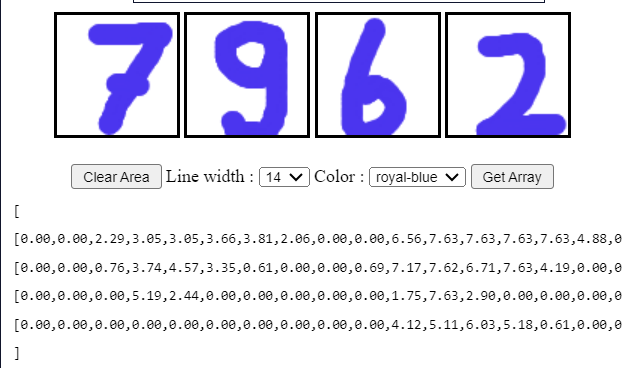

In [7]:
new_samples = (
    [
[0.00,0.00,2.29,3.05,3.05,3.66,3.81,2.06,0.00,0.00,6.56,7.63,7.63,7.63,7.63,4.88,0.00,0.00,0.00,0.00,0.00,4.65,7.48,0.91,0.00,0.00,0.00,0.31,2.44,7.63,4.04,0.00,0.00,0.00,0.00,5.27,7.64,7.62,1.29,0.00,0.00,0.00,0.00,4.66,7.62,3.58,0.15,0.00,0.00,0.00,0.38,7.25,4.96,0.00,0.00,0.00,0.00,0.00,1.38,7.40,1.91,0.00,0.00,0.00],
[0.00,0.00,0.76,3.74,4.57,3.35,0.61,0.00,0.00,0.69,7.17,7.62,6.71,7.63,4.19,0.00,0.00,1.46,7.63,3.05,0.00,6.95,5.34,0.00,0.00,0.15,6.79,7.01,4.50,7.63,5.34,0.00,0.00,0.00,1.14,5.73,6.87,7.48,5.34,0.00,0.00,0.00,0.00,0.00,0.00,6.11,5.34,0.00,0.00,0.00,2.75,3.20,0.08,6.95,5.03,0.00,0.00,0.00,4.88,7.55,6.93,7.62,2.67,0.00],
[0.00,0.00,0.00,5.19,2.44,0.00,0.00,0.00,0.00,0.00,1.75,7.63,2.90,0.00,0.00,0.00,0.00,0.00,5.11,7.10,0.31,0.00,0.00,0.00,0.00,0.30,7.40,4.28,0.00,0.00,0.00,0.00,0.00,2.21,7.63,7.62,6.24,1.15,0.00,0.00,0.00,3.67,7.63,6.86,6.94,5.87,0.00,0.00,0.00,3.82,7.63,0.31,5.80,6.64,0.00,0.00,0.00,2.98,7.63,7.40,7.63,3.05,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.12,5.11,6.03,5.18,0.61,0.00,0.00,0.15,5.65,6.02,5.57,7.63,2.97,0.00,0.00,0.00,0.00,0.00,0.07,7.63,3.81,0.00,0.00,0.00,0.00,0.00,2.13,7.63,2.59,0.00,0.00,0.00,0.00,0.46,6.17,6.71,0.15,0.00,0.00,0.00,0.84,6.02,7.62,4.88,3.05,2.13,0.00,0.69,7.40,7.63,7.64,7.63,7.63,6.25]
]
)

# storing the prediction in new_labels
new_labels = model.predict(new_samples)
print(new_labels)

[4 6 8 6]


We can look at the Cluster Center Images and take a guess of what index looks like what. e.g.
- index 0 looks like `8`
- index 1 looks like `1` and so on

In [8]:
print('Predicted Numbers: ')
for i in range(len(new_labels)):
    if new_labels[i]==0:
        print(1, end=' ')
    elif new_labels[i]==1:
        print(5, end=' ')
    elif new_labels[i]==2:
        print(8, end=' ')
    elif new_labels[i]==3:
        print(0, end=' ')
    elif new_labels[i]==4:
        print(7, end=' ')
    elif new_labels[i]==5:
        print(3, end=' ')
    elif new_labels[i]==6:
        print(9, end=' ')
    elif new_labels[i]==7:
        print(4, end=' ')
    elif new_labels[i]==8:
        print(6, end=' ')
    elif new_labels[i]==9:
        print(2, end=' ')

print('\nCorrect Numbers:\n7 9 6 2')

Predicted Numbers: 
7 9 6 9 
Correct Numbers:
7 9 6 2
